In [1]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
from helper import load_trip_data

trips_that_didnt_go_anywhere, trips_that_went_somewhere, other_errors = load_trip_data()

In [3]:
# Top 10 rows from trips_that_didnt_go_anywhere DataFrame
print("Top 10 trips_that_didnt_go_anywhere:")
display(trips_that_didnt_go_anywhere.head(10))

# # Top 10 elements from trips_that_went_somewhere (list of tuples)
# print("Top 10 trips_that_went_somewhere:")
# for i, item in enumerate(trips_that_went_somewhere[:10]):
#     print(f"{i+1}: {item}")

# # Top 10 elements from other_errors (list of tuples)
# print("Top 10 other_errors:")
# for i, item in enumerate(other_errors[:10]):
#     print(f"{i+1}: {item}")

Top 10 trips_that_didnt_go_anywhere:


,bike_id,from_station,from_station_lat,from_station_lng,to_station,to_station_lat,to_station_lng,departure_time,arrival_time
0,612804,Branickiego - Ledóchowskiej,52.155439,21.073689,Branickiego - Ledóchowskiej,52.155439,21.073689,2025-04-02 19:44:13,2025-04-02 19:46:16
1,613206,Rondo Wiatraczna,52.244564,21.083806,Rondo Wiatraczna,52.244564,21.083806,2025-04-02 19:44:13,2025-04-02 19:46:16
2,613345,Szaserów – Garwolińska,52.249684,21.092105,Szaserów – Garwolińska,52.249684,21.092105,2025-04-02 19:44:13,2025-04-02 19:46:16
3,613487,Żelazna - Chłodna,52.237314,20.988849,Żelazna - Chłodna,52.237314,20.988849,2025-04-02 19:45:14,2025-04-02 19:47:18
4,612403,Plac Na Rozdrożu,52.219962,21.025830,Plac Na Rozdrożu,52.219962,21.025830,2025-04-02 19:44:13,2025-04-02 19:47:18
5,613247,Czerniakowska- Szwoleżerów,52.215851,21.046341,Czerniakowska- Szwoleżerów,52.215851,21.046341,2025-04-02 19:47:18,2025-04-02 19:49:21
6,612648,Stryjeńskich - Belgradzka,52.137604,21.050553,Stryjeńskich - Belgradzka,52.137604,21.050553,2025-04-02 19:47:18,2025-04-02 19:49:21
7,612934,Park Kultury w Powsinie,52.116250,21.087655,Park Kultury w Powsinie,52.116250,21.087655,2025-04-02 19:48:20,2025-04-02 19:50:23
8,613429,Książęca - Rozbrat,52.230087,21.030236,Książęca - Rozbrat,52.230087,21.030236,2025-04-02 19:48:20,2025-04-02 19:50:23
9,612885,Metro Stokłosy,52.156867,21.033840,Metro Stokłosy,52.156867,21.033840,2025-04-02 19:46:16,2025-04-02 19:50:23


In [4]:
warsaw_bike_movements = pd.read_csv('..\\bike_movements_warsaw.csv')

In [5]:
def get_unique_from_stations(df):
    """
    Extract unique destinations from the 'destination' column of the DataFrame.
    """
    return df['from_station'].unique()

In [6]:
print(f"Number of unique station names {len(warsaw_bike_movements['from_station'].unique())}")

unique_from_station_coords = warsaw_bike_movements[['from_station_lat', 'from_station_lng']].drop_duplicates()
num_unique_from_station_coords = len(unique_from_station_coords)
print("Number of unique (from_station_lat, from_station_lng) combinations:", num_unique_from_station_coords)

Number of unique station names 343
Number of unique (from_station_lat, from_station_lng) combinations: 343


In [7]:
from helper import create_station_location_mapping
from helper import find_outlier_stations


In [8]:
location_to_station, station_to_location = create_station_location_mapping(warsaw_bike_movements)

for loc, name in list(location_to_station.items())[:5]:
    print(f"Location: {loc} -> Station Name: {name}")

Location: (52.230978, 21.003676) -> Station Name: Emilii Plater - Złota
Location: (52.155439, 21.073689) -> Station Name: Branickiego - Ledóchowskiej
Location: (52.244564, 21.083806) -> Station Name: Rondo Wiatraczna
Location: (52.249684, 21.092105) -> Station Name: Szaserów – Garwolińska
Location: (52.237314, 20.988849) -> Station Name: Żelazna - Chłodna


In [4]:
from helper import find_outlier_stations
warsaw_bike_movements = pd.read_csv('..\\bike_movements_warsaw.csv')
unique_from_station_coords = warsaw_bike_movements[['from_station_lat', 'from_station_lng']].drop_duplicates()
outlier_stations = find_outlier_stations(unique_from_station_coords)
print("Outlier stations based on location:")
display(outlier_stations)
outlier_coords = [tuple(x) for x in outlier_stations[['from_station_lat', 'from_station_lng']].values]
no_outlier_stations_coords = [x for x in location_to_station.keys() if x not in outlier_coords]
print(len(no_outlier_stations_coords), "stations without outliers")
print(len((list(location_to_station.keys()))))

NameError: name 'pd' is not defined

In [10]:
# Get the names of stations corresponding to the outlier coordinates
outlier_coords = [tuple(x) for x in outlier_stations[['from_station_lat', 'from_station_lng']].values]
outlier_names = [location_to_station.get(coord, None) for coord in outlier_coords]
print("Outlier station names:")
for name, coord in zip(outlier_names, outlier_coords):
    print(f"{name} at {coord}")

Outlier station names:
AMB - Riera Blanca Nord at (41.371631, 2.127232)
AMB - METRO La Pau at (41.423345, 2.205672)
AMB - Diagonal I at (41.386602, 2.116364)
AMB - Diagonal II at (41.386799, 2.116236)
AMB - Campus Diagonal - Besòs at (41.413419, 2.22175)
AMB - METRO Baró de Viver at (41.448479, 2.199556)


In [12]:
station_location_to_departure_count = {x: 0 for x in no_outlier_stations_coords}
for data, iterary in trips_that_went_somewhere:
    from_coords = (data['from_station_lat'], data['from_station_lng'])
    # print(from_coords)
    if from_coords in no_outlier_stations_coords:
        # print('e')
        station_location_to_departure_count[from_coords] +=1
    

In [13]:
# Get top 10 stations by departure count using station_location_to_departure_count
top10_departures = sorted(station_location_to_departure_count.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 stations with highest departures count:")
for coord, count in top10_departures:
    name = location_to_station.get(coord, None)
    print(f"{name} at {coord}: {count} departures")


Top 10 stations with highest departures count:
Metro Centrum Nauki Kopernik at (52.239358, 21.031136): 2800 departures
Arkadia at (52.25574, 20.984343): 1788 departures
Metro Dworzec Wileński - Targowa at (52.254419, 21.035632): 1762 departures
Stefana Banacha - UW at (52.210772, 20.984756): 1687 departures
Westfield Mokotów  at (52.178689, 21.002814): 1502 departures
Rondo Jazdy Polskiej at (52.217486, 21.014295): 1280 departures
al. Niepodległości - Batorego at (52.210833, 21.007851): 1265 departures
Lipowa - Dobra at (52.241907, 21.024259): 1252 departures
al. Prymasa Tysiąclecia - Kasprzaka at (52.227451, 20.956839): 1164 departures
Metro Rondo Daszyńskiego at (52.229707, 20.983223): 1153 departures


In [14]:
station_colors = {}

for key in station_location_to_departure_count:
    count = station_location_to_departure_count[key]
    if count < 100:
        station_colors[key] = 'red'
    elif count < 100:
        station_colors[key] = 'orangered'
    elif count < 150:
        station_colors[key] = 'orange'
    elif count < 200:
        station_colors[key] = 'gold'
    elif count < 300:
        station_colors[key] = 'yellow'
    elif count < 400:
        station_colors[key] = 'yellowgreen'
    elif count < 500:
        station_colors[key] = 'limegreen'
    elif count < 600:
        station_colors[key] = 'green'
    elif count < 800:
        station_colors[key] = 'forestgreen'
    else:
        station_colors[key] = 'darkgreen'

station_legend = [
    ('< 100', 'red'),
    ('100–149', 'orange'),
    ('150–199', 'gold'),
    ('200–299', 'yellow'),
    ('300–399', 'yellowgreen'),
    ('400–499', 'limegreen'),
    ('500–599', 'green'),
    ('600–799', 'forestgreen'),
    ('800+', 'darkgreen')
]


In [15]:
from voronoi_drawer import draw_voronoi_heatmap_on_warsaw

Is there problem with mapping: True


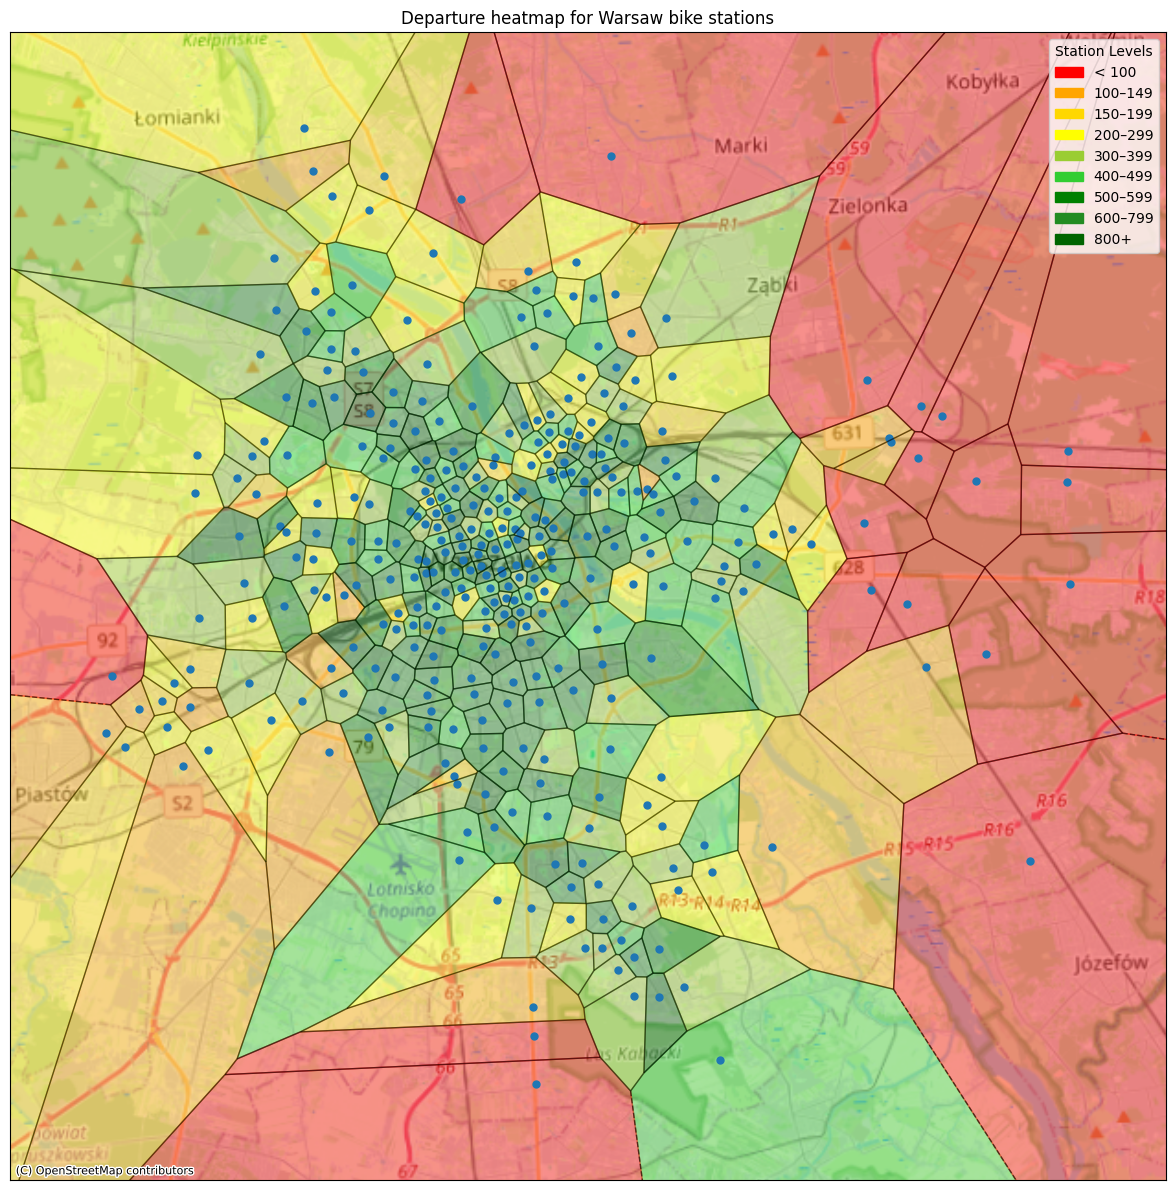

In [16]:
draw_voronoi_heatmap_on_warsaw(no_outlier_stations_coords,station_colors, name = "Departure heatmap for Warsaw bike stations", save=True,station_legend=station_legend,zoom = 1)